rate: 44100 Hz
data is a: <class 'numpy.ndarray'>
data shape is: (25233408, 2)


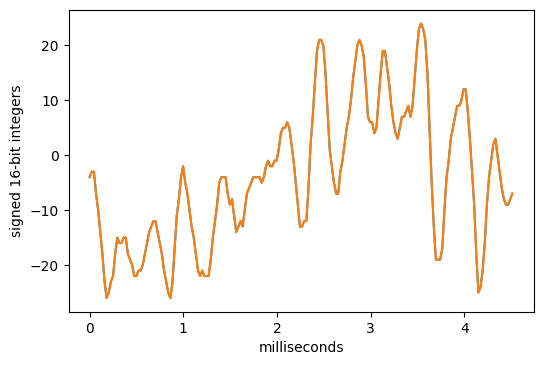

<ipython-input-7-645f2cb6ae23>:140: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  results = pd.Series(results)


entropy1: 0.0
entropia dla próbek z najmlodszego bitu: 5.540533566775329
entropia dla próbek z  dwóch najmlodszych bitu: 5.516370301352173
entropia dla próbek z  czterech najmlodszych bitu: 5.350380573471453


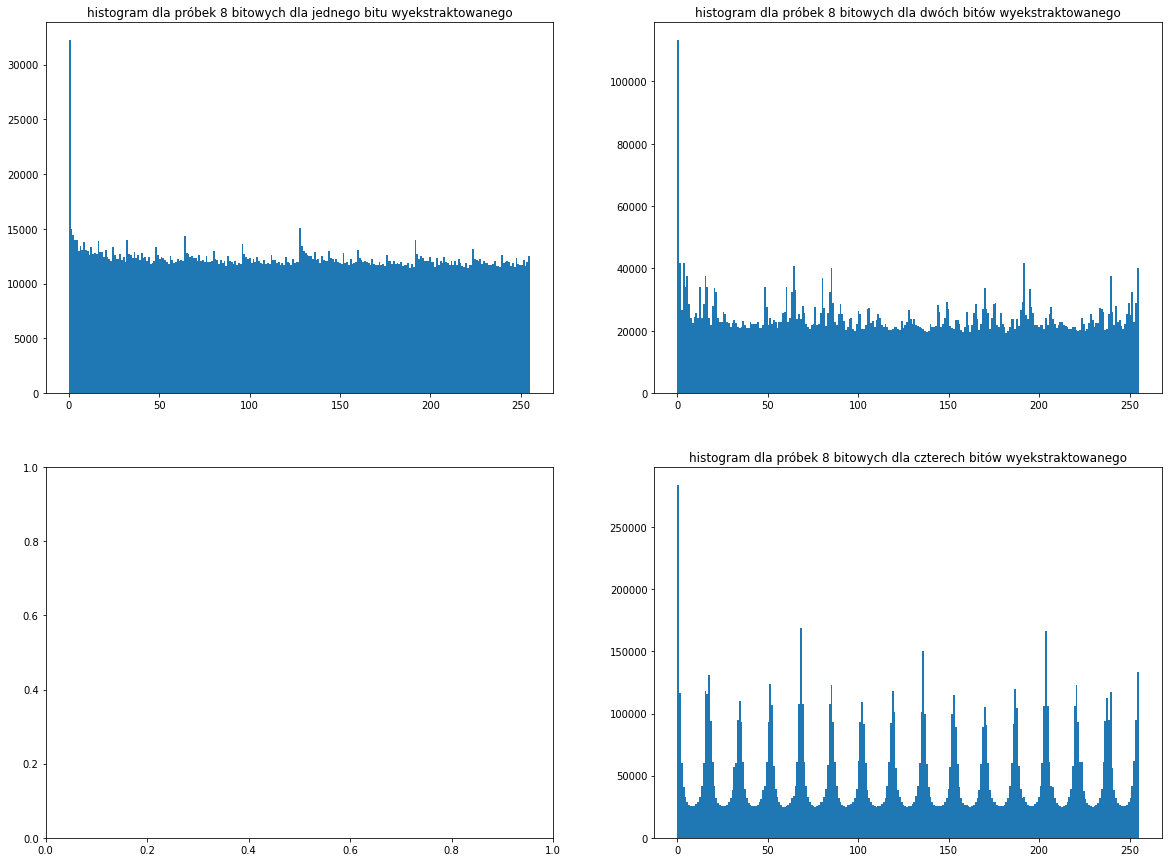

In [7]:
import numpy as np
from array import array
from scipy.io.wavfile import read as wavread
from scipy.stats import entropy as en
import pandas as pd
from math import log, e

import matplotlib.pyplot as plt

samplerate = 44100
freq = 440
seconds = 2
time = np.linspace(0., seconds, seconds * samplerate, endpoint=False)
signal = np.sin(2 * np.pi * freq * time)

rate, data = wavread('samples.wav')
print('rate:', rate, 'Hz')
print('data is a:', type(data))
print('data shape is:', data.shape)

plt.subplots(dpi=100)
plt.plot(time[:200] * 1000, data[:200])
plt.xlabel('milliseconds')
plt.ylabel('signed 16-bit integers')
plt.show()

results = array('L', [])

fig, axs = plt.subplots(2, 2, figsize=(20,15))

def makeInputData(data, val = 1):
    inputData = []
    result = 0
    mask = 0b00000000
    shifter = 0
    divider = 0
    divRes = 0
    if val == 1:
        mask = 0b00000001
        shifter = 1
        divider = 8
        divRes = 7
    elif val == 2:
        mask = 0b00000011
        shifter = 2
        divider = 4
        divRes = 3
    elif val == 4:
        mask = 0b00001111
        shifter = 4
        divider = 2
        divRes = 1
    else:
        return
    for idx, item in enumerate(data[:, 0]):
        result = (result << shifter | (item & mask))
        if idx % divider == divRes:
            inputData.append(result)
            result = 0
    return inputData

def makeHistogramGraph( data,title, row, col):
    axs[row,col].hist(data, bins = 256)
    axs[row,col].set_title(title)



histOneBit = makeInputData(data, 1)

hisTwoBits = makeInputData(data, 2)

histFourBits = makeInputData(data, 4)

makeHistogramGraph(histOneBit, "histogram dla próbek 8 bitowych dla jednego bitu wyekstraktowanego", 0,0)
makeHistogramGraph(hisTwoBits, "histogram dla próbek 8 bitowych dla dwóch bitów wyekstraktowanego", 0,1)
# makeHistogramGraph(hisThreeBits, "histogram dla próbek 8 bitowych dla trzech bitów wyekstraktowanego", 1,0)
makeHistogramGraph(histFourBits, "histogram dla próbek 8 bitowych dla czterech bitów wyekstraktowanego", 1,1)


results = pd.Series(results)
histOneBit = pd.Series(histOneBit)
# hisTwoBits = pd.Series(hisTwoBits)
# hisThreeBits = pd.Series(hisThreeBits)
# histFourBits = pd.Series(histFourBits)
data = results.value_counts()
print('entropy1:', en(data))

def entropy4(results, base=None):
  value,counts = np.unique(results, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

print('entropia dla próbek z najmlodszego bitu:', entropy4(histOneBit))
print('entropia dla próbek z  dwóch najmlodszych bitu:', entropy4(hisTwoBits))
# print('entropia dla próbek z  trzech najmlodszych bitu:', entropy4(hisThreeBits))
print('entropia dla próbek z  czterech najmlodszych bitu:', entropy4(histFourBits))